In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
def f(xy):
    x,y = xy
    return 5*(x)**2 +y**2+1

In [3]:
print(f"At the point x = {0}, y = {0}, the function takes the value {f([0,0])}")

At the point x = 0, y = 0, the function takes the value 1


/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_1905/584476113.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


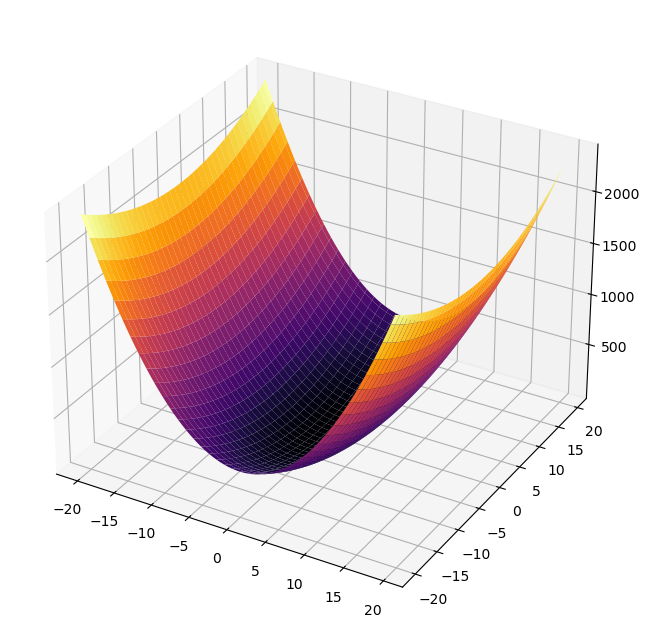

In [4]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_1905/397963560.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


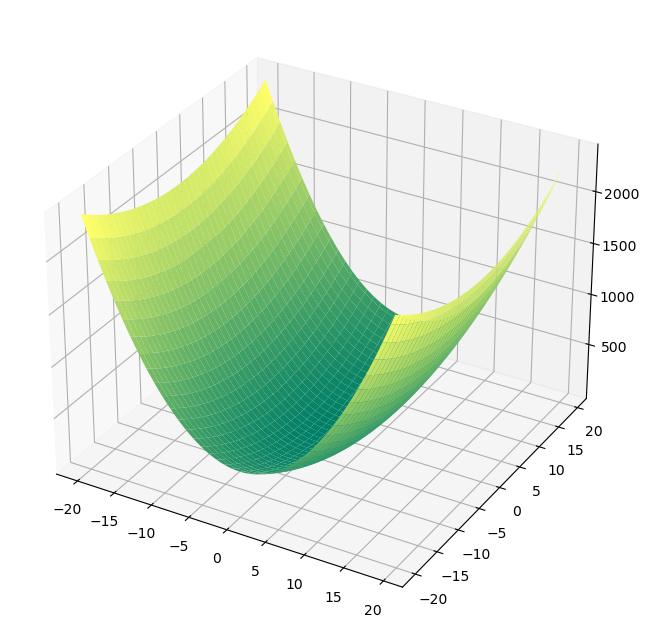

In [5]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='summer')

fig.show()

In [6]:
def g(xy):
    x,y = xy
    return 10*x,2*y

In [7]:
print(f"At the point x = {1}, y = {2}, the gradient of the function takes the value {g([1, 2])}")

At the point x = 1, y = 2, the gradient of the function takes the value (10, 4)


In [8]:
#start - start value
#gradient_func - the gradient_function
#learning_rate
#max_iterations - a limit on how many jumps we want
#tolerance - the value to stop the algo at(how close to minima)

def gradient_descent(start, gradient_func, learning_rate, max_iterations, tolerance = 0.01):
    
    x = np.array(start, dtype = float)
    
    steps = [x.copy()]
    
    for _ in range(max_iterations):
        grad = np.array(gradient_func(x), dtype=float)
        
        diff = learning_rate*grad
        
        if np.linalg.norm(diff)<tolerance:
            break
            
        x = x - diff
        
        steps.append(x.copy())
        
    return np.array(steps),x

In [9]:
history, result = gradient_descent(np.array([18.0, 7.0]), g, 0.01, 100000)

In [10]:
print(history)
print(result)

[[1.80000000e+01 7.00000000e+00]
 [1.62000000e+01 6.86000000e+00]
 [1.45800000e+01 6.72280000e+00]
 [1.31220000e+01 6.58834400e+00]
 [1.18098000e+01 6.45657712e+00]
 [1.06288200e+01 6.32744558e+00]
 [9.56593800e+00 6.20089667e+00]
 [8.60934420e+00 6.07687873e+00]
 [7.74840978e+00 5.95534116e+00]
 [6.97356880e+00 5.83623433e+00]
 [6.27621192e+00 5.71950965e+00]
 [5.64859073e+00 5.60511946e+00]
 [5.08373166e+00 5.49301707e+00]
 [4.57535849e+00 5.38315672e+00]
 [4.11782264e+00 5.27549359e+00]
 [3.70604038e+00 5.16998372e+00]
 [3.33543634e+00 5.06658404e+00]
 [3.00189271e+00 4.96525236e+00]
 [2.70170344e+00 4.86594732e+00]
 [2.43153309e+00 4.76862837e+00]
 [2.18837978e+00 4.67325580e+00]
 [1.96954180e+00 4.57979069e+00]
 [1.77258762e+00 4.48819487e+00]
 [1.59532886e+00 4.39843098e+00]
 [1.43579598e+00 4.31046236e+00]
 [1.29221638e+00 4.22425311e+00]
 [1.16299474e+00 4.13976805e+00]
 [1.04669527e+00 4.05697269e+00]
 [9.42025739e-01 3.97583323e+00]
 [8.47823166e-01 3.89631657e+00]
 [7.630408

In [23]:
history1, min1 = gradient_descent(
    start=[18.0, 7.0],
    gradient_func=g,
    learning_rate=0.01,
    max_iterations=10000,
    tolerance=0.0001
)

print(f"Начальная точка: [18.0, 7.0]")
print(f"Начальное значение f: {f([18.0, 7.0]):.6f}")
print(f"Найденный минимум: [{min1[0]:.8f}, {min1[1]:.8f}]")
print(f"Значение f в минимуме: {f(min1):.8f}")
print(f"Ожидаемый минимум: [0, 0], значение: 1")
print(f"Количество шагов: {len(history1)}")
print(f"Норма градиента в конце: {np.linalg.norm(g(min1)):.8f}")

# Проверка близости к истинному минимуму
assert np.linalg.norm(min1) < 0.01, f"Не достигнут минимум! Получено: {min1}"
assert abs(f(min1) - 1) < 0.01, f"Значение функции далеко от 1! Получено: {f(min1)}"
print("✓ ТЕСТ 1 ПРОЙДЕН: Найден минимум вблизи (0, 0)")

Начальная точка: [18.0, 7.0]
Начальное значение f: 1670.000000
Найденный минимум: [0.00000000, 0.00495746]
Значение f в минимуме: 1.00002458
Ожидаемый минимум: [0, 0], значение: 1
Количество шагов: 360
Норма градиента в конце: 0.00991492
✓ ТЕСТ 1 ПРОЙДЕН: Найден минимум вблизи (0, 0)


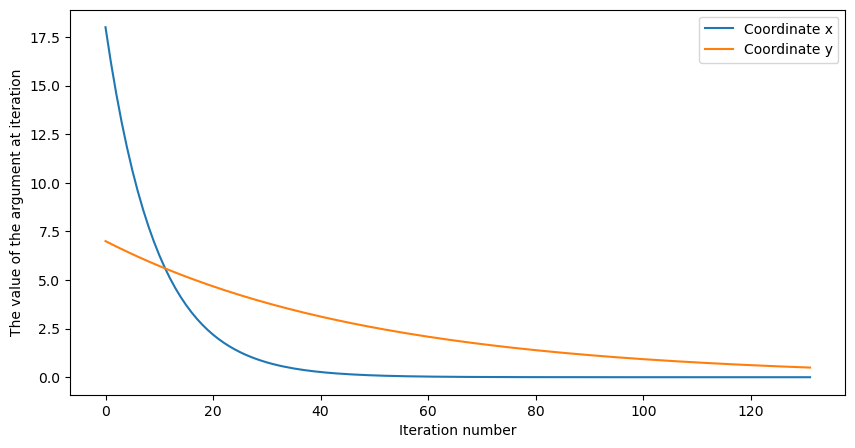

In [24]:
plt.figure(figsize=(10, 5))

plt.plot(history)

plt.xlabel('Iteration number')
plt.ylabel('The value of the argument at iteration')

plt.legend(['Coordinate x', 'Coordinate y'])

plt.show()

/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_3784/4155489653.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


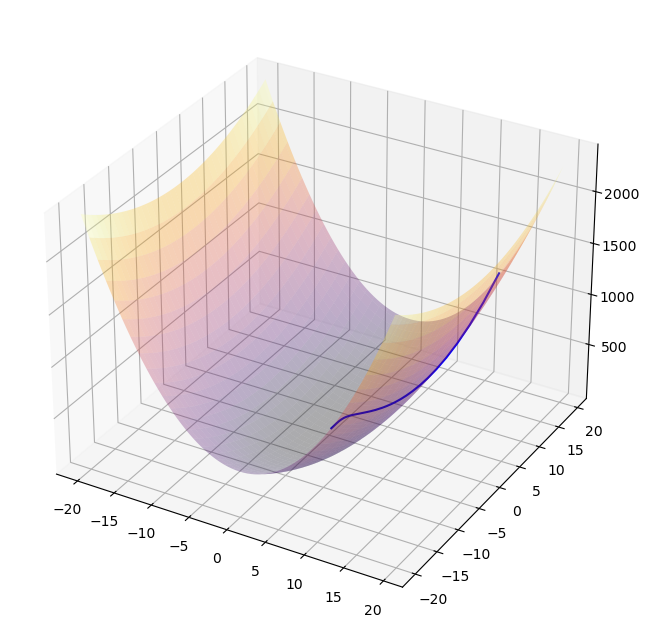

In [25]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

# Draw the function with transparency 0.3
ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

# Draw the path in the same way, passing the values in the zero, first
# history columns, as well as the values of the function f at these points
ax.plot(history[:, 0], history[:, 1], f([history[:, 0], history[:, 1]]), color='blue')

fig.show()

Experimenting with functions

In [27]:
import math

In [36]:
def f(xy):
    x,y = xy
    
    return (math.exp(-(x**2+y**2)/10) * math.sin(3*math.pi*x)*math.cos(2*math.pi*y)+0.1*(x**3 - 3*x*(y**2))+0.5*math.atan(y/x)*(1+0.2*math.sin(5*math.sqrt(x**2+y**2))))

In [32]:
x = 1
math.exp(x)

2.718281828459045

In [37]:
# Протестируем функцию
test_points = [[1, 1], [2, 3], [0.5, -0.5]]

for point in test_points:
    try:
        result = f(point)
        print(f"f({point}) = {result}")
    except Exception as e:
        print(f"Ошибка для {point}: {e}")

f([1, 1]) = 0.24837291737003844
f([2, 3]) = -4.180580231516308
f([0.5, -0.5]) = 0.5636763396376416


In [39]:
def f(xy):
    x, y = xy

    return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)

/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_3784/2651685328.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log((np.log(x ** 2 + 1) * y + (y - 3) * x) ** 2)
/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_3784/2700785433.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/opt/anaconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:113: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


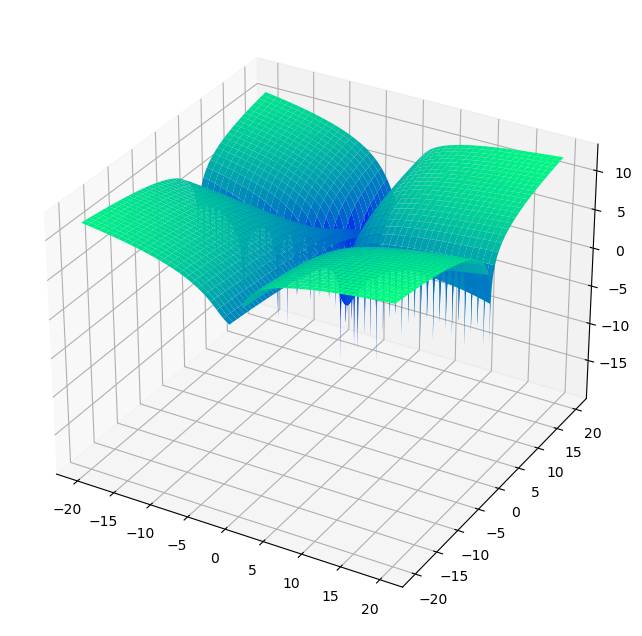

In [40]:
u, v = np.mgrid[-20:20:0.05, -20:20:0.05]
z = f([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='winter')

fig.show()

In [41]:
def f(xy):
    x,y = xy
    return (x - y)**2

In [42]:
print(f"At the point x = {0}, y = {0}, the function takes the value {f([0,0])}")

At the point x = 0, y = 0, the function takes the value 0


/var/folders/f6/y0jst_bn3m76k2ldjxy747_80000gn/T/ipykernel_3784/1997334142.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


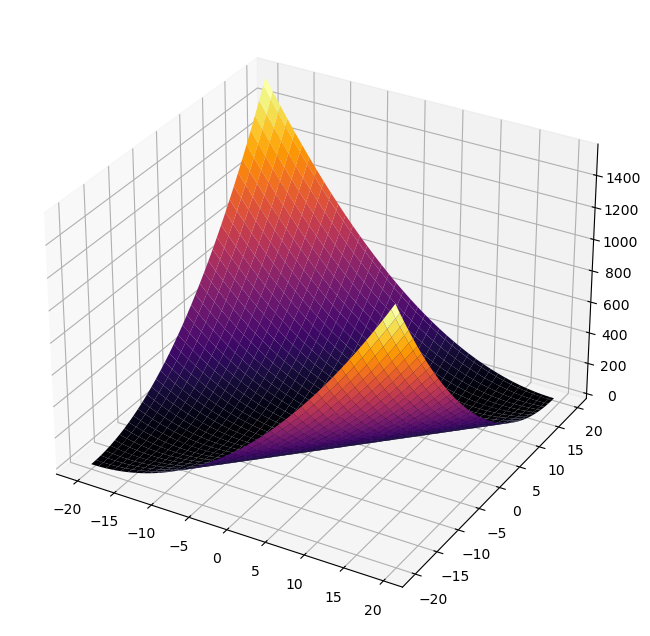

In [43]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]

z = f([u,v])

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

ax.plot_surface(u,v, z, cmap = 'inferno')

fig.show()

In [45]:
def g(xy):
    x,y = xy
    return np.array([2*(x-y),2*(y-x)])

In [46]:
print(f"At the point x = {1}, y = {2}, the gradient of the function takes the value {g([1, 2])}")

At the point x = 1, y = 2, the gradient of the function takes the value [-2  2]


In [65]:
#start - start value
#gradient_func - the gradient_function
#learning_rate
#max_iterations - a limit on how many jumps we want
#tolerance - the value to stop the algo at(how close to minima)

def momentum(start, gradient_func, learning_rate, max_iterations, tolerance = 0.01):
    beta = 0.9
    x = np.array(start, dtype = float)
    
    velocity = np.zeros_like(x)
    steps = [x.copy()]
    
    for _ in range(max_iterations):
        grad = np.array(gradient_func(x), dtype=float)
        
        velocity = beta*velocity+(1-beta)*grad
        
        x_new = x - learning_rate*velocity
        
        steps.append(x_new.copy())
        
        if np.linalg.norm(x_new-x)<tolerance:
            break
            
        x = x_new
        
    return np.array(steps),x

In [66]:
steps_history, final_point = momentum(np.array([18, 7]), g, 0.01, 10000)

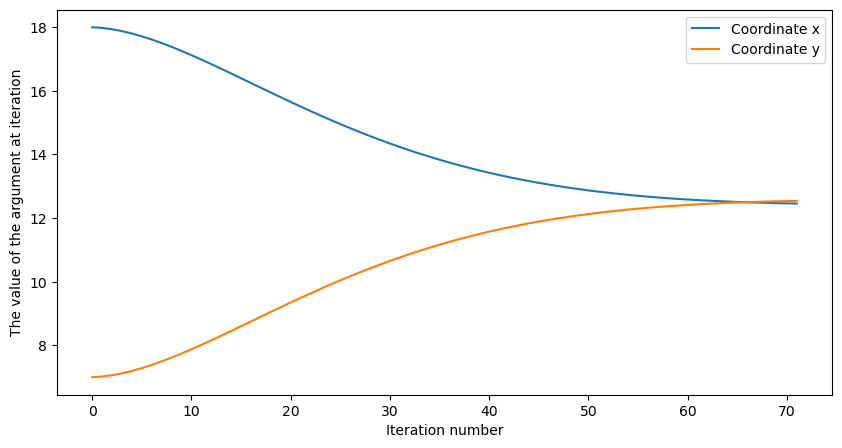

In [67]:
plt.figure(figsize=(10, 5))

plt.plot(steps_history[:, 0], label='Coordinate x')  # Все значения x
plt.plot(steps_history[:, 1], label='Coordinate y')  # Все значения y

plt.xlabel('Iteration number')
plt.ylabel('The value of the argument at iteration')

plt.legend(['Coordinate x', 'Coordinate y'])

plt.show()

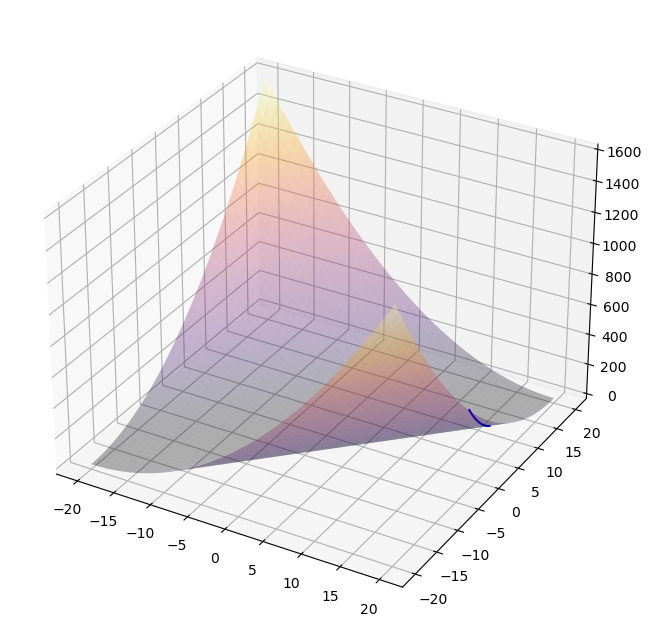

In [70]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(projection='3d')

ax.plot_surface(u, v, z, cmap='inferno', alpha=0.3)

ax.plot(steps_history[:, 0], steps_history[:, 1], f([steps_history[:, 0], steps_history[:, 1]]), color='blue')